In [3]:
import cv2
img = cv2.imread("peppers.jpeg")
pixel = img [100,100]
print(pixel)

[66 35 62]


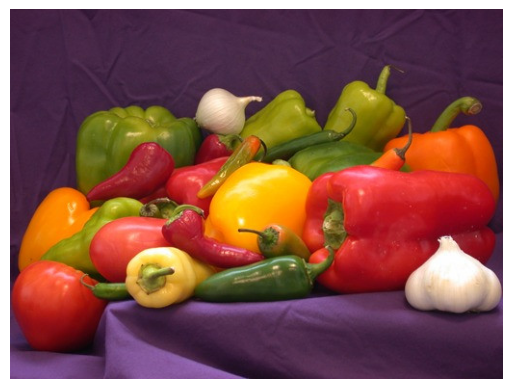

In [4]:
from matplotlib import pyplot as plt
import numpy as np
brightness = 50
bright_img = np.clip(img.astype(np.int16) + brightness, 0, 255).astype(np.uint8)
contrast = 1.5
contrast_img = np.clip(((img - np.mean(img)) * contrast + np.mean(img)), 0, 255).astype(np.uint8)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)


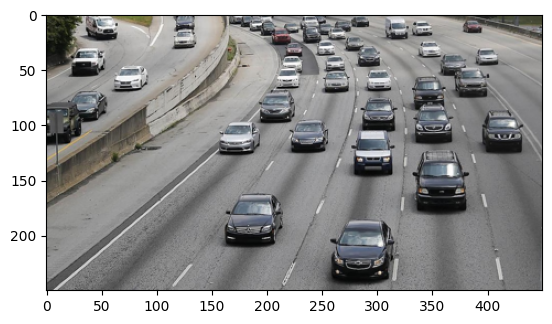

In [4]:
img = cv2.imread("cars.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_rgb)
plt.show()


In [5]:
cv2.CascadeClassifier()
stop_cascade = cv2.CascadeClassifier('haarcascade_car.xml')
found = stop_cascade.detectMultiScale(img_gray, minSize=(20, 20))
found

array([[213,  22,  23,  23],
       [376,   1,  23,  23],
       [329,   3,  24,  24],
       [106,   7,  35,  35],
       [273,  21,  36,  36],
       [ 10,  19,  50,  50],
       [ 52,  47,  34,  34],
       [285,  51,  27,  27],
       [239,  41,  45,  45],
       [364,  40,  49,  49],
       [184,  66,  45,  45],
       [318,  70,  66,  66],
       [206,  86,  57,  57],
       [145,  88,  57,  57],
       [384,  80,  60,  60],
       [266, 105,  60,  60],
       [325, 131,  69,  69]], dtype=int32)

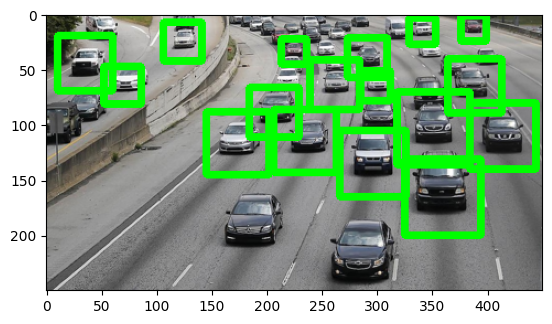

In [6]:
for (x, y, w, h) in found: cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 5)
plt.imshow(img_rgb)
plt.show()

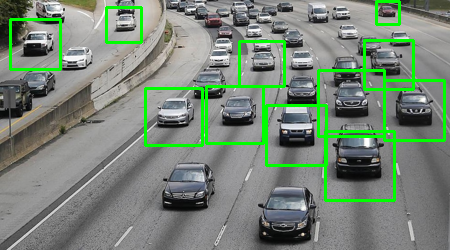

In [11]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('cars.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
car_cascade = cv2.CascadeClassifier('haarcascade_car.xml')
cars = car_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
for (x, y, w, h) in cars:
  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import tarfile, os

#  Extract CIFAR-10
if os.path.exists("cifar-10-python.tar.gz"):
    with tarfile.open("cifar-10-python.tar.gz", "r:gz") as tar:
        tar.extractall(path="./data")
    print("Local CIFAR-10 archive extracted.")

# Преобразование изображений
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load Datasets
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data  = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=64, shuffle=False)

print("Datasets ready. Training samples:", len(train_data), "| Test samples:", len(test_data))

# Определение модели
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1   = nn.Linear(32 * 8 * 8, 128)
        self.fc2   = nn.Linear(128, 10)
        self.relu  = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#Настройка обучения
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#Обучение модели
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs} | Loss: {running_loss/len(train_loader):.4f}")

#Evaluate model accuracy Проверка точности
correct, total = 0, 0
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f" Test Accuracy: {accuracy:.2f}%")


/tmp/ipython-input-2165450888.py:11: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path="./data")


Local CIFAR-10 archive extracted.
Datasets ready. Training samples: 50000 | Test samples: 10000
Epoch 1/5 | Loss: 1.4176
Epoch 2/5 | Loss: 1.0870
Epoch 3/5 | Loss: 0.9524
Epoch 4/5 | Loss: 0.8586
Epoch 5/5 | Loss: 0.7788
 Test Accuracy: 68.78%
